# Med MNIST

### Data Loading && Prepare

In [126]:
!pip3 install torch tqdm torchsummary torchvision fastprogress matplotlib pandas scikit-learn torchmetrics timm numpy albumentations scikit-image --quiet

In [127]:
import pandas as pd
import os

In [128]:
path = "./MedMNIST"
classes = os.listdir(path)
print(classes)

['Hand', 'BreastMRI', 'ChestCT', 'HeadCT', 'AbdomenCT', 'CXR']


In [129]:
import torch

In [130]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [131]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
dataset=ImageFolder(path,ToTensor())
dataset

Dataset ImageFolder
    Number of datapoints: 58954
    Root location: ./MedMNIST
    StandardTransform
Transform: ToTensor()

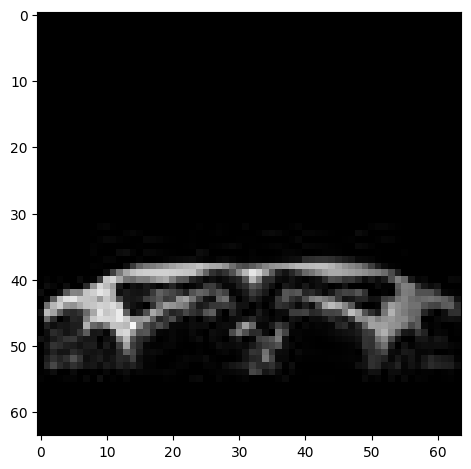

In [132]:
import matplotlib.pyplot as plt
import skimage.io as io
io.imshow('./MedMNIST/BreastMRI/000010.jpeg');

In [137]:
train_set,test_set,valid_set=torch.utils.data.random_split(dataset,[50000,6000,2954])

In [138]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, shuffle=True,batch_size = 16)
test_loader = DataLoader(test_set, batch_size = 16)
valid_loader = DataLoader(valid_set, batch_size = 16)

In [139]:
from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall


In [140]:
import timm
import torch
import torch.nn as nn
from tqdm import tqdm
import numpy as np

In [141]:
num_classes = len(classes)
print(num_classes)

model = timm.create_model('resnet34', pretrained=True, num_classes=num_classes)
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

6


In [142]:
model.to(device)
print('Done')

Done


In [143]:
from torchmetrics.classification.roc import MulticlassROC

MClsROC = MulticlassROC(num_classes=num_classes)
Accuracy = MulticlassAccuracy(num_classes=num_classes).to(device)
Precision = MulticlassPrecision(num_classes=num_classes).to(device)
Recall = MulticlassRecall(num_classes=num_classes).to(device)


In [144]:
for e in range(10):
    print(f"Epoch: {e + 1}")
    loss_train = []
    loss_test = []
    mcls_test = []
    model.train()
    for x, y in tqdm(train_loader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        predict = model(x)
        l = loss_f(predict, y)
        l.backward()
        loss_train.append(float(l.item()))
        optimizer.step()

        Accuracy.update(predict, y)
        Precision.update(predict, y)
        Recall.update(predict, y)
        MClsROC.update(predict, y)
        mcls_test.append(MClsROC.compute())
    print("Acc: ", Accuracy.compute())
    print("Prec: ", Precision.compute())
    print("Rec: ", Recall.compute())
    print("MClsROC: ", MClsROC.compute())

    print(np.mean(loss_train))
    model.eval()
    for x, y in tqdm(test_loader):
        with torch.no_grad():
            x, y = x.to(device), y.to(device)
            predict = model(x)
            l = loss_f(predict, y)
            loss_test.append(float(l.item()))
            Accuracy.update(predict, y)
            Precision.update(predict, y)
            Recall.update(predict, y)
            MClsROC.update(predict, y)
    print("Acc: ", Accuracy.compute())
    print("Prec: ", Precision.compute())
    print("Rec: ", Recall.compute())
    print("MClsROC: ", MClsROC.compute())
    print(np.mean(loss_test))

    if Accuracy.compute() < 0.00001:
        break


Epoch: 1


100%|██████████| 3125/3125 [21:07<00:00,  2.47it/s]


Acc:  tensor(0.9733)
Prec:  tensor(0.9738)
Rec:  tensor(0.9733)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000e+00, 1.1813e-04, 2.3627e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.3111e-04, 2.6223e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1848e-04, 2.3697e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 2.3602e-04, 3.5402e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1843e-04, 2.3685e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1696e-04, 2.3392e-04,  ..., 1.0000e+

100%|██████████| 375/375 [01:15<00:00,  4.97it/s]


Acc:  tensor(0.9762)
Prec:  tensor(0.9766)
Rec:  tensor(0.9762)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000e+00, 1.0521e-04, 2.1042e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1714e-04, 2.3427e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.0520e-04, 2.1039e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 2.1142e-04, 3.1712e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 2.1117e-04, 3.1676e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.0503e-04, 2.1006e-04,  ..., 1.0000e+

100%|██████████| 3125/3125 [23:02<00:00,  2.26it/s]


Acc:  tensor(0.9871)
Prec:  tensor(0.9873)
Rec:  tensor(0.9871)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000e+00, 5.5648e-05, 1.6694e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 6.1866e-05, 1.8560e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1145e-04, 3.3434e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1152e-04, 1.6728e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 5.5819e-05, 1.1164e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.6601e-04, 3.8736e-04,  ..., 1.0000e+

100%|██████████| 375/375 [01:18<00:00,  4.80it/s]


Acc:  tensor(0.9878)
Prec:  tensor(0.9880)
Rec:  tensor(0.9878)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000e+00, 5.2604e-05, 1.0521e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1714e-04, 2.3427e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.0520e-04, 4.2079e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.0571e-04, 1.5856e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 5.2793e-05, 1.0559e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 2.6258e-04, 5.2515e-04,  ..., 1.0000e+

100%|██████████| 3125/3125 [25:25<00:00,  2.05it/s]


Acc:  tensor(0.9915)
Prec:  tensor(0.9916)
Rec:  tensor(0.9915)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000e+00, 9.0992e-04, 2.5478e-03,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 8.0968e-05, 4.4533e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000, 0.0039, 0.0077,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000e+00, 1.0951e-04, 1.4602e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.0955e-04, 5.4773e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 3.6242e-05, 1.1960e-03,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+

100%|██████████| 375/375 [01:14<00:00,  5.04it/s]


Acc:  tensor(0.9918)
Prec:  tensor(0.9919)
Rec:  tensor(0.9918)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000e+00, 9.1180e-04, 2.4899e-03,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.1714e-04, 5.8569e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000, 0.0042, 0.0087,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000e+00, 1.0571e-04, 1.4094e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.0559e-04, 5.2793e-04,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]), tensor([0.0000e+00, 1.4004e-04, 1.8555e-03,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+

100%|██████████| 3125/3125 [27:16<00:00,  1.91it/s]


Acc:  tensor(0.9937)
Prec:  tensor(0.9938)
Rec:  tensor(0.9937)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000, 0.0070, 0.0138,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0021, 0.0052,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0089, 0.0201,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0016, 0.0059,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0019, 0.0066,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000e+00, 8.0834e-04, 5.5776e-03,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00])], [tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 2.1301e-11, 1.6533e-11,
        1.0357e-11]), tensor([1.0000e+00, 1.00

100%|██████████| 375/375 [01:15<00:00,  4.96it/s]


Acc:  tensor(0.9938)
Prec:  tensor(0.9939)
Rec:  tensor(0.9938)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000, 0.0157, 0.0273,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0025, 0.0061,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0102, 0.0224,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0021, 0.0114,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0021, 0.0070,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000e+00, 8.1399e-04, 5.8817e-03,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00])], [tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 2.1301e-11, 1.6533e-11,
        1.0357e-11]), tensor([1.0000e+00, 1.00

100%|██████████| 3125/3125 [28:19<00:00,  1.84it/s]


Acc:  tensor(0.9949)
Prec:  tensor(0.9950)
Rec:  tensor(0.9949)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000, 0.0160, 0.0288,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0165, 0.0317,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0161, 0.0321,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0031, 0.0135,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0041, 0.0131,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0080, 0.0222,  ..., 1.0000, 1.0000, 1.0000])], [tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 4.6214e-12, 3.8322e-12,
        2.9263e-13]), tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.1698

100%|██████████| 375/375 [01:14<00:00,  5.05it/s]


Acc:  tensor(0.9950)
Prec:  tensor(0.9951)
Rec:  tensor(0.9950)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000, 0.0158, 0.0286,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0163, 0.0314,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0203, 0.0390,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0031, 0.0132,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0041, 0.0130,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0078, 0.0217,  ..., 1.0000, 1.0000, 1.0000])], [tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 4.6214e-12, 3.8322e-12,
        2.9263e-13]), tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.1698

100%|██████████| 3125/3125 [29:57<00:00,  1.74it/s]


Acc:  tensor(0.9958)
Prec:  tensor(0.9958)
Rec:  tensor(0.9958)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000, 0.0159, 0.0306,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0226, 0.0431,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0367, 0.0629,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0049, 0.0180,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0037, 0.0123,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0178, 0.0405,  ..., 1.0000, 1.0000, 1.0000])], [tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.0262e-13, 8.6899e-13,
        2.9263e-13]), tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0342

100%|██████████| 375/375 [01:15<00:00,  4.98it/s]


Acc:  tensor(0.9959)
Prec:  tensor(0.9959)
Rec:  tensor(0.9959)
MClsROC:  ([tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000])], [tensor([0.0000, 0.0160, 0.0313,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0243, 0.0461,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0402, 0.0684,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0054, 0.0202,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0037, 0.0122,  ..., 1.0000, 1.0000, 1.0000]), tensor([0.0000, 0.0177, 0.0406,  ..., 1.0000, 1.0000, 1.0000])], [tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.0262e-13, 8.6899e-13,
        2.9263e-13]), tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0342

100%|█████████▉| 3122/3125 [31:44<00:01,  1.67it/s]

: 

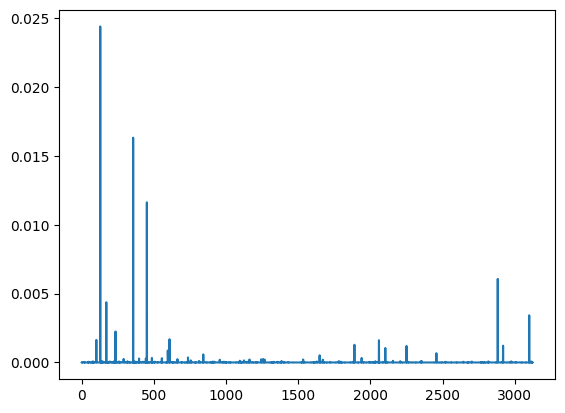

In [109]:
import matplotlib.pyplot as plt
plt.plot(loss_train)

### Gini index

# Gini = AUC * 2 - 1

Коэффициент Джини вычисляется как двойная площадь между кривой ROC и диагональю (или как Gini = 2AUC - 1). Коэффициент Джини всегда находится между 0 и 1, и чем он больше, тем лучше классификатор. При маловероятном условии, что кривая ROC находится ниже диагонали, коэффициент Джини будет отрицательным.

Чтобы посчитать индекс Gini, нужно сперва определить TP, FP, TN и FN значения (например, на валидационной выборке):


In [122]:
loss_valid = []

for x, y in tqdm(valid_loader):
    with torch.no_grad():
            x, y = x.to(device), y.to(device)
            predict = model(x)
            l = loss_f(predict, y)
            loss_valid.append(float(l.item()))
            Accuracy.update(predict, y)
            Precision.update(predict, y)
            Recall.update(predict, y)
            MClsROC.update(predict, y)
            
print("Acc: ", Accuracy.compute())
print("Prec: ", Precision.compute())
print("Rec: ", Recall.compute())

print(np.mean(loss_valid))

  0%|          | 0/185 [00:00<?, ?it/s]


NameError: name 'MClsROC' is not defined

MulticlassROC()

In [ ]:
gini = roc_auc_score * 2 - 1
gini